<a href="https://colab.research.google.com/github/ValerieLangat/DS-Unit-2-Regression-1/blob/master/Sprint_2_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving pageviews-20151201-20190523.csv to pageviews-20151201-20190523 (2).csv


{'pageviews-20151201-20190523.csv': b'Date,"Beyonc\xc3\xa9"\n2015-12-01,10726\n2015-12-02,10478\n2015-12-03,10689\n2015-12-04,12380\n2015-12-05,11879\n2015-12-06,11701\n2015-12-07,11682\n2015-12-08,11285\n2015-12-09,10889\n2015-12-10,10433\n2015-12-11,10149\n2015-12-12,10027\n2015-12-13,11877\n2015-12-14,11397\n2015-12-15,10297\n2015-12-16,10219\n2015-12-17,9847\n2015-12-18,9241\n2015-12-19,9685\n2015-12-20,9598\n2015-12-21,9383\n2015-12-22,9433\n2015-12-23,8934\n2015-12-24,8950\n2015-12-25,9160\n2015-12-26,9385\n2015-12-27,10330\n2015-12-28,10633\n2015-12-29,10284\n2015-12-30,10425\n2015-12-31,10758\n2016-01-01,10681\n2016-01-02,11493\n2016-01-03,11380\n2016-01-04,10652\n2016-01-05,10407\n2016-01-06,10313\n2016-01-07,11641\n2016-01-08,19215\n2016-01-09,17560\n2016-01-10,15499\n2016-01-11,13342\n2016-01-12,12540\n2016-01-13,11997\n2016-01-14,11993\n2016-01-15,12777\n2016-01-16,12627\n2016-01-17,13304\n2016-01-18,12448\n2016-01-19,11919\n2016-01-20,11062\n2016-01-21,11799\n2016-01-22,12

In [2]:
import pandas as pd
df = pd.read_csv('pageviews-20151201-20190523.csv')
df.shape

(1270, 2)

In [0]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

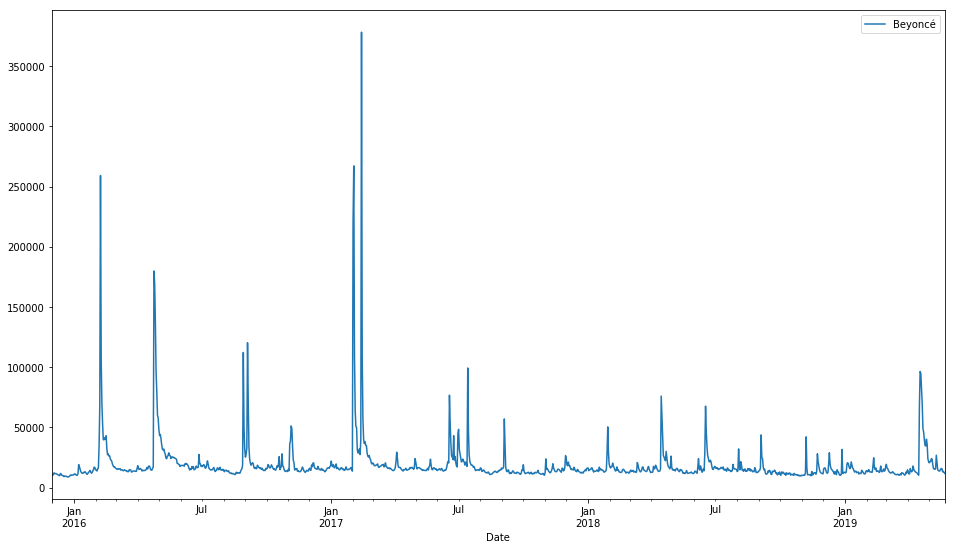

In [4]:
df.plot(figsize=(16,9));

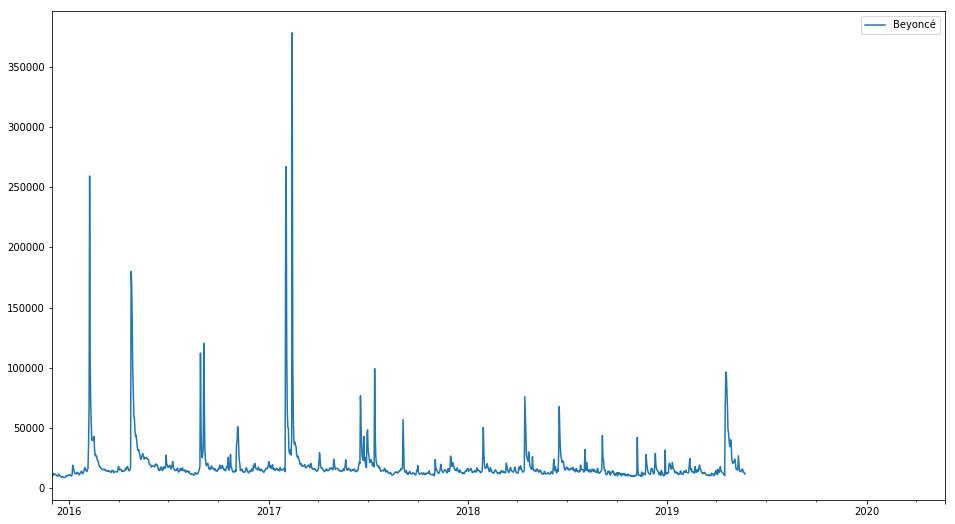

In [5]:
df = df.reindex(pd.date_range(start='2015-12-01', end='2020-05-23'))
df.plot(figsize=(16,9));

In [6]:
df['Beyoncé'].mean()

19057.288976377953

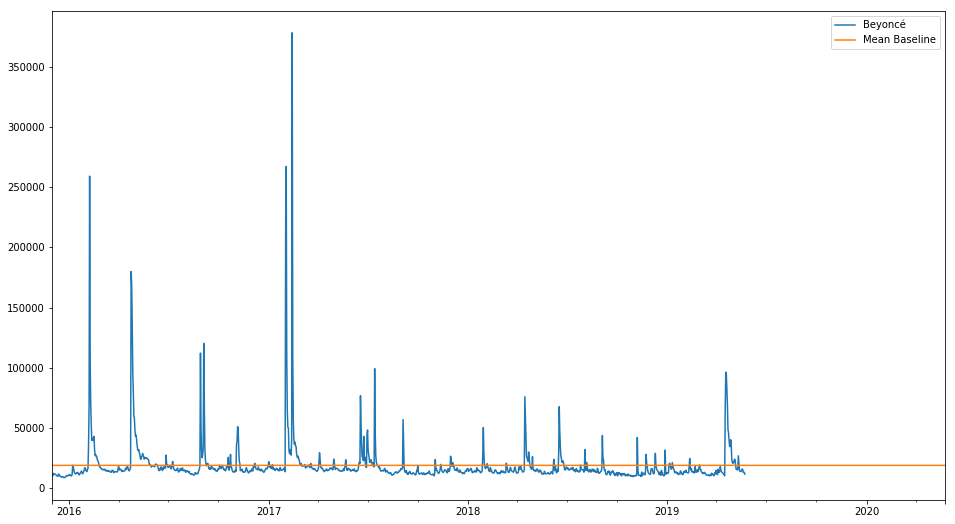

In [7]:
df['Mean Baseline'] = df['Beyoncé'].mean()
df.plot(figsize=(16,9));

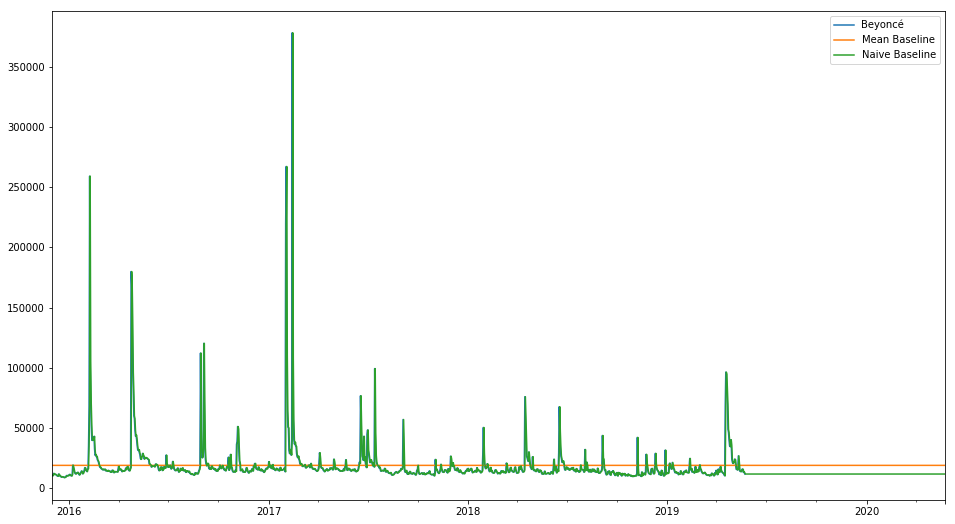

In [8]:
df['Naive Baseline'] = df['Beyoncé'].shift(1).ffill()
df.plot(figsize=(16,9))

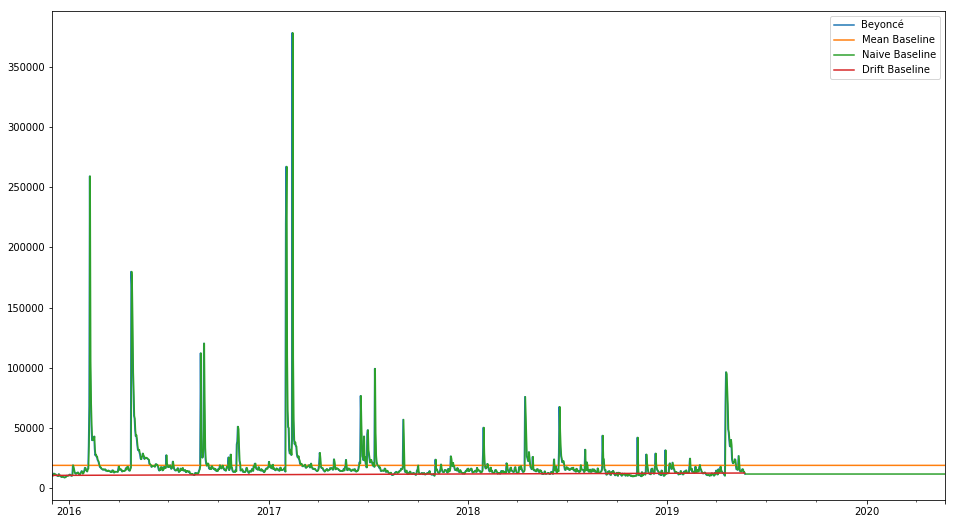

In [9]:
import numpy as np
df['Drift Baseline'] = np.nan
df.loc['2015-12-01', 'Drift Baseline'] = df.loc['2015-12-01', 'Beyoncé']
df.loc['2019-05-22', 'Drift Baseline'] = df.loc['2019-05-22', 'Beyoncé']
df['Drift Baseline'] = df['Drift Baseline'].interpolate(limit_area='inside')
df.plot(figsize=(16,9));

In [10]:
df = df.reset_index().rename(columns={'index': 'ds', 'Beyoncé': 'y'})
df.head()

,ds,y,Mean Baseline,Naive Baseline,Drift Baseline
0,2015-12-01,10726.0,19057.288976,NaN,10726.000000
1,2015-12-02,10478.0,19057.288976,10726.0,10727.560726
2,2015-12-03,10689.0,19057.288976,10478.0,10729.121451
3,2015-12-04,12380.0,19057.288976,10689.0,10730.682177
4,2015-12-05,11879.0,19057.288976,12380.0,10732.242902


In [11]:
from fbprophet import Prophet
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1996,2021-05-19
1997,2021-05-20
1998,2021-05-21
1999,2021-05-22
2000,2021-05-23


In [0]:
forecast = m.predict(future)

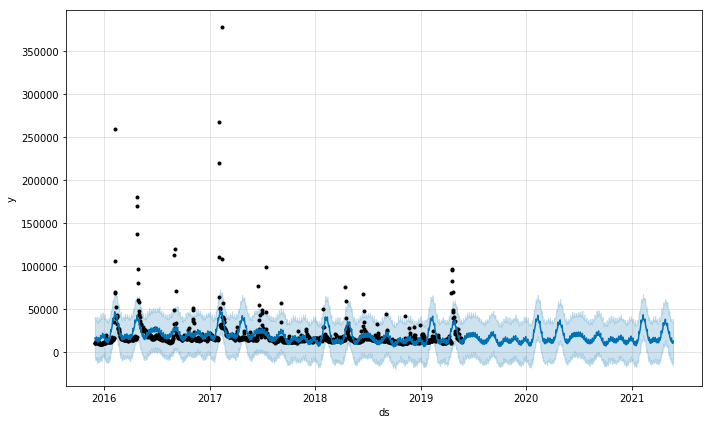

In [14]:
fig1 = m.plot(forecast)

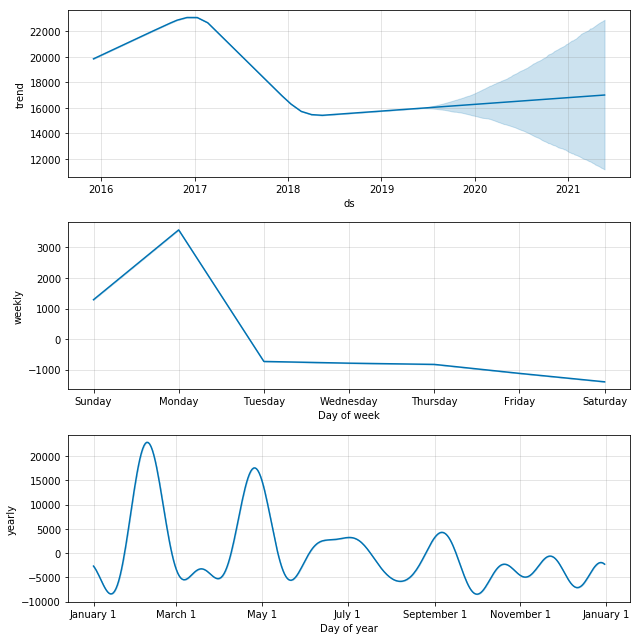

In [15]:
fig2 = m.plot_components(forecast)